# *UAS PRAKTIKUM ML*
- Muhammad Rizki Al-Fathir
- Muhammad Saifurridwani ‘Ijazi
- Riza Anwar Fadil

# Import Library

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import string
import emoji
from sklearn.model_selection import train_test_split
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Cleaning Data

In [4]:
df = pd.read_csv('review_viki_eng.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122983 entries, 0 to 122982
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Username  122983 non-null  object
 1   Review    122720 non-null  object
 2   Rating    122983 non-null  int64 
 3   Tanggal   122983 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.8+ MB


In [6]:
df.head()

,Username,Review,Rating,Tanggal
0,A Google user,I love that you had my k-drama I wanted to wat...,2,2025-04-12 02:00:29
1,A Google user,I have enjoyed a variety of shows on this serv...,5,2025-04-12 00:09:01
2,A Google user,This app is the best platform to watch dramas ...,3,2025-04-11 22:37:00
3,A Google user,it has too many ads,4,2025-04-11 22:28:23
4,A Google user,so much ads are coming....for 5 - 5 minutes ad...,1,2025-04-11 21:06:41


In [7]:
jumlah_duplikasi = df.duplicated().sum()
jumlah_nilai_kosong = df.isnull().sum()

print("Jumlah Duplikasi:", jumlah_duplikasi)
print("Jumlah Nilai Kosong per Kolom:")
print(jumlah_nilai_kosong)

Jumlah Duplikasi: 0
Jumlah Nilai Kosong per Kolom:
Username      0
Review      263
Rating        0
Tanggal       0
dtype: int64


In [8]:
df =  df[['Review', 'Rating']]
df

,Review,Rating
0,I love that you had my k-drama I wanted to wat...,2
1,I have enjoyed a variety of shows on this serv...,5
2,This app is the best platform to watch dramas ...,3
3,it has too many ads,4
4,so much ads are coming....for 5 - 5 minutes ad...,1
...,...,...
122978,FINALLY YO,5
122979,I'm unable to search for some channels for som...,4
122980,Is it me or when you try to search for somethi...,4
122981,I love this website soooo much :D,5


In [9]:
jumlah_duplikasi = df.duplicated().sum()
jumlah_nilai_kosong = df.isnull().sum()

print("Jumlah Duplikasi:", jumlah_duplikasi)
print("Jumlah Nilai Kosong per Kolom:")
print(jumlah_nilai_kosong)

Jumlah Duplikasi: 22735
Jumlah Nilai Kosong per Kolom:
Review    263
Rating      0
dtype: int64


In [10]:
df = df.drop_duplicates()
df.dropna()
df

,Review,Rating
0,I love that you had my k-drama I wanted to wat...,2
1,I have enjoyed a variety of shows on this serv...,5
2,This app is the best platform to watch dramas ...,3
3,it has too many ads,4
4,so much ads are coming....for 5 - 5 minutes ad...,1
...,...,...
122977,Thx Viki...great website.. I will...definitly ...,5
122978,FINALLY YO,5
122979,I'm unable to search for some channels for som...,4
122980,Is it me or when you try to search for somethi...,4


In [11]:
df.isnull().sum()

Review    5
Rating    0
dtype: int64

In [ ]:
#clean
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  
    text = re.sub(r'\@\w+|\#', '', text)  
    text = re.sub(r'\d+', '', text)  
    text = emoji.replace_emoji(text, replace='')  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    text = re.sub(r'[^\x00-\x7f]', '', text) 
    text = re.sub(r'\s+', ' ', text).strip()  
    return text

df['Review'] = df['Review'].astype(str).apply(clean_text)

NameError: name 'df' is not defined

In [13]:
jumlah_duplikasi = df.duplicated().sum()
jumlah_nilai_kosong = df.isnull().sum()

print("Jumlah Duplikasi:", jumlah_duplikasi)
print("Jumlah Nilai Kosong per Kolom:")
print(jumlah_nilai_kosong)

Jumlah Duplikasi: 6923
Jumlah Nilai Kosong per Kolom:
Review    0
Rating    0
dtype: int64


In [14]:
df = df.drop_duplicates()

In [15]:
df

,Review,Rating
0,I love that you had my kdrama I wanted to watc...,2
1,I have enjoyed a variety of shows on this serv...,5
2,This app is the best platform to watch dramas ...,3
3,it has too many ads,4
4,so much ads are comingfor minutes ads are ther...,1
...,...,...
122977,Thx Vikigreat website I willdefinitly recomend...,5
122978,FINALLY YO,5
122979,Im unable to search for some channels for some...,4
122980,Is it me or when you try to search for somethi...,4


In [16]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [17]:
df = df[df['Review'].str.strip().astype(bool)]

Untuk menfokus kan analisis maka akan dilakukan pengecekan lagi bahwa review benar benar sudah dalam bahasa inggris.

In [18]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False  

df['is_english'] = df['Review'].apply(is_english)
df= df[df['is_english']].drop(columns='is_english')

df

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_9480\1764480939.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_english'] = df['Review'].apply(is_english)


,Review,Rating
0,I love that you had my kdrama I wanted to watc...,2
1,I have enjoyed a variety of shows on this serv...,5
2,This app is the best platform to watch dramas ...,3
3,it has too many ads,4
4,so much ads are comingfor minutes ads are ther...,1
...,...,...
122976,stars ppl What are you waitin for Enjoy Good j...,5
122977,Thx Vikigreat website I willdefinitly recomend...,5
122979,Im unable to search for some channels for some...,4
122980,Is it me or when you try to search for somethi...,4


dapat dilihat bahwa terjadi pengurangan rows yang cukup banyak setelah di filter bahasa inggris saja.

# Preprocessing

In [19]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
    words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
    mask = (words_count >= min_words) & (words_count <= max_words)
    filtered_df = dataframe[mask]
    return filtered_df

min_words = 3
max_words = 50
df = filter_tokens_by_length(df, 'Review', min_words, max_words)

In [20]:
normalization_dict = {
    "cant": "can't",
    "wont": "won't",
    "dont": "don't",
    "doesnt": "doesn't",
    "isnt": "isn't",
    "arent": "aren't",
    "shouldnt": "shouldn't",
    "couldnt": "couldn't",
    "wouldnt": "wouldn't",
    "didnt": "didn't",
    "hasnt": "hasn't",
    "havent": "haven't",
    "wasnt": "wasn't",
    "werent": "weren't",
    "u": "you",
    "ur": "your",
    "r": "are",
    "im": "i'm",
    "ive": "i've",
    "id": "i'd",
    "ill": "i'll",
    "luv": "love",
    "ya": "you",
    "tho": "though",
    "lmao": "laughing",
    "lol": "laughing",
    "omg": "oh my god",
    "nah": "no",
    "btw": "by the way",
    "yup": "yes",
    "yep": "yes",
    "ok": "okay",
    "alr": "already"
}

def normalize_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = text.split()
    normalized_tokens = [normalization_dict.get(token, token) for token in tokens]
    return ' '.join(normalized_tokens)

df['normalized_review'] = df['Review'].astype(str).apply(normalize_text)
df[['Review', 'normalized_review']].head(10)

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_9480\1420729177.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_review'] = df['Review'].astype(str).apply(normalize_text)


,Review,normalized_review
1,I have enjoyed a variety of shows on this serv...,i have enjoyed a variety of shows on this serv...
2,This app is the best platform to watch dramas ...,this app is the best platform to watch dramas ...
3,it has too many ads,it has too many ads
4,so much ads are comingfor minutes ads are ther...,so much ads are comingfor minutes ads are ther...
6,great I love the movies on it thats why I subs...,great i love the movies on it thats why i subs...
7,love this app,love this app
9,why is not have Tamil subtitles we want Tamil ...,why is not have tamil subtitles we want tamil ...
10,I cant pay cos Im too young do you have money ...,i can't pay cos i'm too young do you have mone...
11,The best app for muvie and serial coreene japa...,the best app for muvie and serial coreene japa...
12,this was worst app because I knew that this ap...,this was worst app because i knew that this ap...


In [21]:
nltk.download('stopwords')

english_stopwords = set(stopwords.words('english'))

def remove_english_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in english_stopwords]
    return ' '.join(filtered)

df['clean_review'] = df['normalized_review'].apply(remove_english_stopwords)
df[['normalized_review', 'clean_review']].head(10)


[nltk_data] Downloading package stopwords to C:\Users\RIZA ANWAR
[nltk_data]     FADIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_9480\687702030.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review'] = df['normalized_review'].apply(remove_english_stopwords)


,normalized_review,clean_review
1,i have enjoyed a variety of shows on this serv...,enjoyed variety shows service one best
2,this app is the best platform to watch dramas ...,app best platform watch dramas noticing proxy ...
3,it has too many ads,many ads
4,so much ads are comingfor minutes ads are ther...,much ads comingfor minutes ads creates much di...
6,great i love the movies on it thats why i subs...,great love movies thats subscribed
7,love this app,love app
9,why is not have tamil subtitles we want tamil ...,tamil subtitles want tamil language
10,i can't pay cos i'm too young do you have mone...,can't pay cos young money really helpful watch...
11,the best app for muvie and serial coreene japa...,best app muvie serial coreene japanese fair price
12,this was worst app because i knew that this ap...,worst app knew app fullfree wasting time know ...


In [22]:
df

,Review,Rating,normalized_review,clean_review
1,I have enjoyed a variety of shows on this serv...,5,i have enjoyed a variety of shows on this serv...,enjoyed variety shows service one best
2,This app is the best platform to watch dramas ...,3,this app is the best platform to watch dramas ...,app best platform watch dramas noticing proxy ...
3,it has too many ads,4,it has too many ads,many ads
4,so much ads are comingfor minutes ads are ther...,1,so much ads are comingfor minutes ads are ther...,much ads comingfor minutes ads creates much di...
6,great I love the movies on it thats why I subs...,5,great i love the movies on it thats why i subs...,great love movies thats subscribed
...,...,...,...,...
122976,stars ppl What are you waitin for Enjoy Good j...,5,stars ppl what are you waitin for enjoy good j...,stars ppl waitin enjoy good job devps thx lot ...
122977,Thx Vikigreat website I willdefinitly recomend...,5,thx vikigreat website i willdefinitly recomend...,thx vikigreat website willdefinitly recomend f...
122979,Im unable to search for some channels for some...,4,i'm unable to search for some channels for som...,unable search channels reason
122980,Is it me or when you try to search for somethi...,4,is it me or when you try to search for somethi...,try search something search bar says match


In [23]:
def tokenize_review(review):
    tokens = review.split()
    return tokens

df['tokens'] = df['clean_review'].apply(tokenize_review)
df['tokens']

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_9480\1830547037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['clean_review'].apply(tokenize_review)


1             [enjoyed, variety, shows, service, one, best]
2         [app, best, platform, watch, dramas, noticing,...
3                                               [many, ads]
4         [much, ads, comingfor, minutes, ads, creates, ...
6                  [great, love, movies, thats, subscribed]
                                ...                        
122976    [stars, ppl, waitin, enjoy, good, job, devps, ...
122977    [thx, vikigreat, website, willdefinitly, recom...
122979                   [unable, search, channels, reason]
122980    [try, search, something, search, bar, says, ma...
122981                         [love, website, soooo, much]
Name: tokens, Length: 74259, dtype: object

In [24]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(review):
    tokens = review.split() 
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos=wordnet.VERB) for token in tokens]  # Lemmatization setiap token
    return lemmatized_tokens

df['lemmatized_tokens'] = df['clean_review'].apply(tokenize_and_lemmatize)
df[['clean_review', 'lemmatized_tokens']]

[nltk_data] Downloading package punkt to C:\Users\RIZA ANWAR
[nltk_data]     FADIL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\RIZA ANWAR
[nltk_data]     FADIL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\RIZA ANWAR
[nltk_data]     FADIL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_9480\1767541829.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_tokens'] = df['clean_review'].apply(tokenize_and_lemmatize)


,clean_review,lemmatized_tokens
1,enjoyed variety shows service one best,"[enjoy, variety, show, service, one, best]"
2,app best platform watch dramas noticing proxy ...,"[app, best, platform, watch, dramas, notice, p..."
3,many ads,"[many, ads]"
4,much ads comingfor minutes ads creates much di...,"[much, ads, comingfor, minutes, ads, create, m..."
6,great love movies thats subscribed,"[great, love, movies, thats, subscribe]"
...,...,...
122976,stars ppl waitin enjoy good job devps thx lot ...,"[star, ppl, waitin, enjoy, good, job, devps, t..."
122977,thx vikigreat website willdefinitly recomend f...,"[thx, vikigreat, website, willdefinitly, recom..."
122979,unable search channels reason,"[unable, search, channel, reason]"
122980,try search something search bar says match,"[try, search, something, search, bar, say, match]"


In [25]:
df['lemmatized_sentence'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_9480\1610525202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_sentence'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))


In [26]:
df

,Review,Rating,normalized_review,clean_review,tokens,lemmatized_tokens,lemmatized_sentence
1,I have enjoyed a variety of shows on this serv...,5,i have enjoyed a variety of shows on this serv...,enjoyed variety shows service one best,"[enjoyed, variety, shows, service, one, best]","[enjoy, variety, show, service, one, best]",enjoy variety show service one best
2,This app is the best platform to watch dramas ...,3,this app is the best platform to watch dramas ...,app best platform watch dramas noticing proxy ...,"[app, best, platform, watch, dramas, noticing,...","[app, best, platform, watch, dramas, notice, p...",app best platform watch dramas notice proxy vp...
3,it has too many ads,4,it has too many ads,many ads,"[many, ads]","[many, ads]",many ads
4,so much ads are comingfor minutes ads are ther...,1,so much ads are comingfor minutes ads are ther...,much ads comingfor minutes ads creates much di...,"[much, ads, comingfor, minutes, ads, creates, ...","[much, ads, comingfor, minutes, ads, create, m...",much ads comingfor minutes ads create much dis...
6,great I love the movies on it thats why I subs...,5,great i love the movies on it thats why i subs...,great love movies thats subscribed,"[great, love, movies, thats, subscribed]","[great, love, movies, thats, subscribe]",great love movies thats subscribe
...,...,...,...,...,...,...,...
122976,stars ppl What are you waitin for Enjoy Good j...,5,stars ppl what are you waitin for enjoy good j...,stars ppl waitin enjoy good job devps thx lot ...,"[stars, ppl, waitin, enjoy, good, job, devps, ...","[star, ppl, waitin, enjoy, good, job, devps, t...",star ppl waitin enjoy good job devps thx lot make
122977,Thx Vikigreat website I willdefinitly recomend...,5,thx vikigreat website i willdefinitly recomend...,thx vikigreat website willdefinitly recomend f...,"[thx, vikigreat, website, willdefinitly, recom...","[thx, vikigreat, website, willdefinitly, recom...",thx vikigreat website willdefinitly recomend f...
122979,Im unable to search for some channels for some...,4,i'm unable to search for some channels for som...,unable search channels reason,"[unable, search, channels, reason]","[unable, search, channel, reason]",unable search channel reason
122980,Is it me or when you try to search for somethi...,4,is it me or when you try to search for somethi...,try search something search bar says match,"[try, search, something, search, bar, says, ma...","[try, search, something, search, bar, say, match]",try search something search bar say match


# Labeling & Visualisasi

Lakukan visualisasi terhadap kata kata yang muncul pada setiap bintang nya.

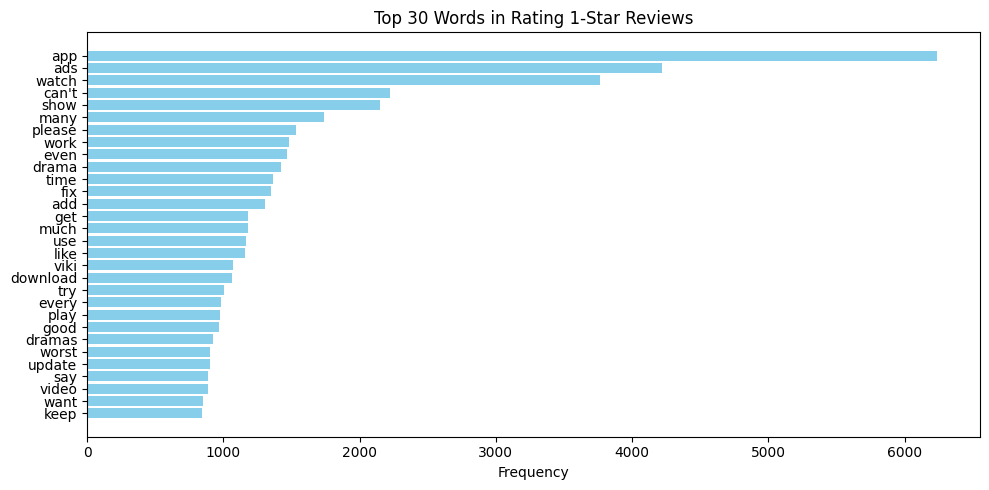

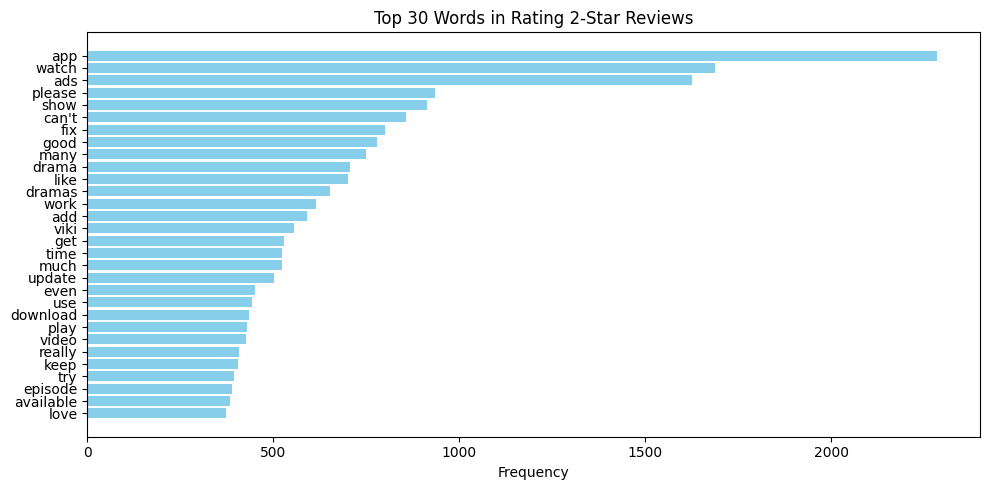

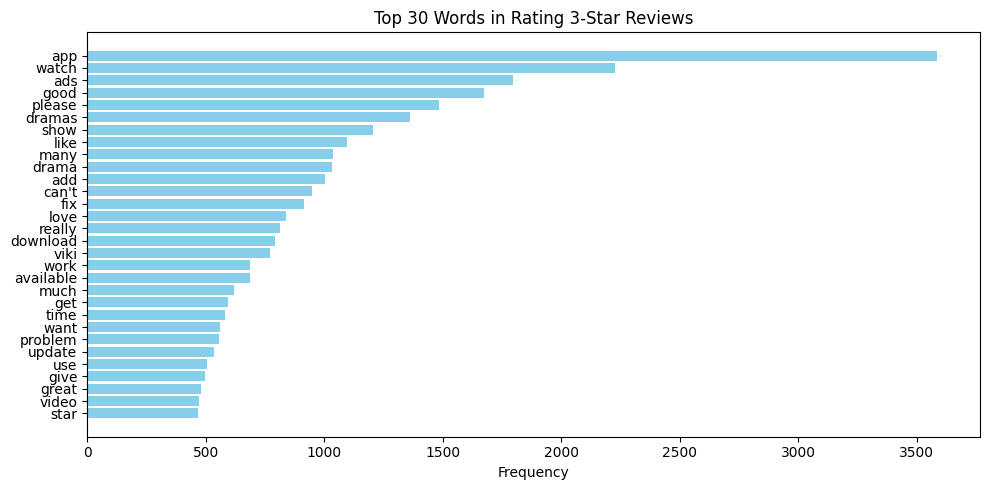

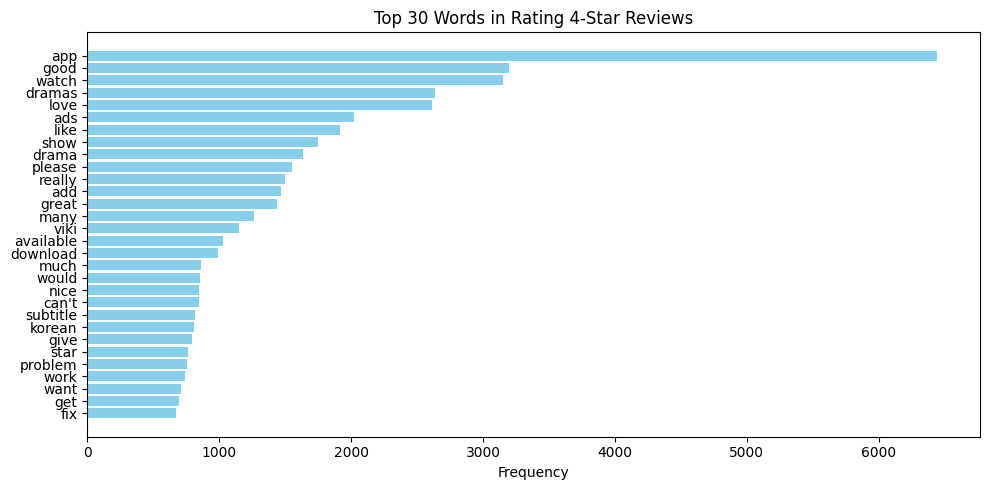

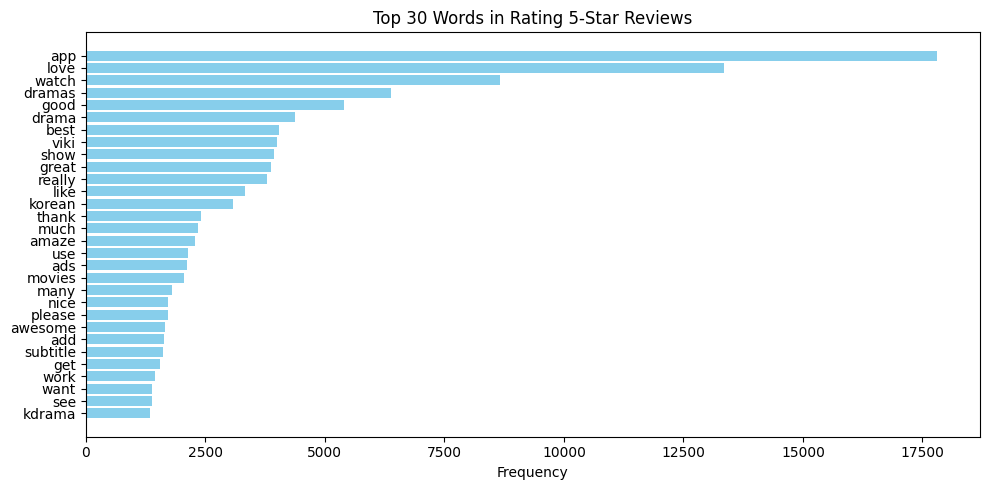

In [ ]:
#label dan visual
def plot_top_words_by_rating(df, rating_col='Rating', tokens_col='lemmatized_tokens', top_n=30):
    ratings = sorted(df[rating_col].unique())
    
    for rating in ratings:
        plt.figure(figsize=(10, 5))
        tokens = df[df[rating_col] == rating][tokens_col].explode()
        counter = Counter(tokens)
        most_common = counter.most_common(top_n)
        
        words, counts = zip(*most_common)
        plt.barh(words[::-1], counts[::-1], color='skyblue')
        plt.title(f"Top {top_n} Words in Rating {rating}-Star Reviews")
        plt.xlabel("Frequency")
        plt.tight_layout()
        plt.show()
        
plot_top_words_by_rating(df)


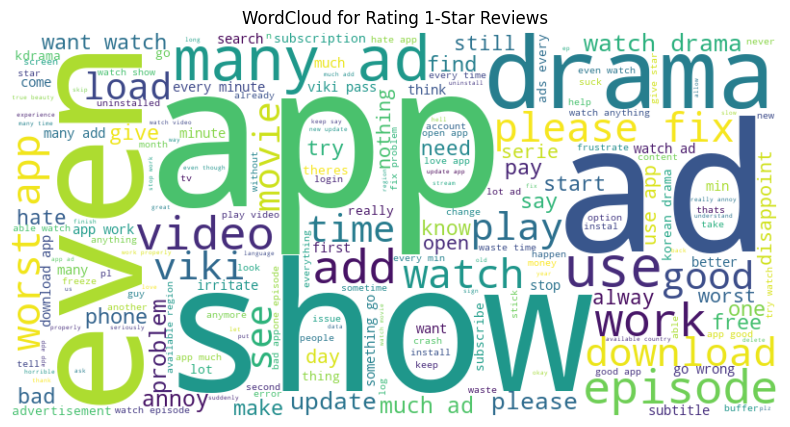

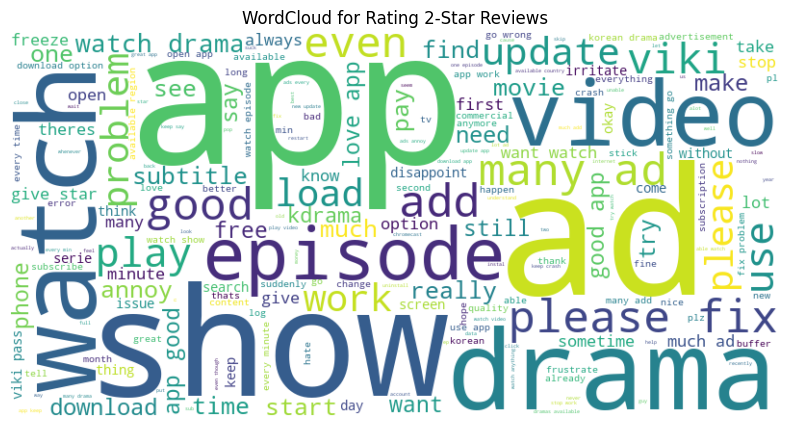

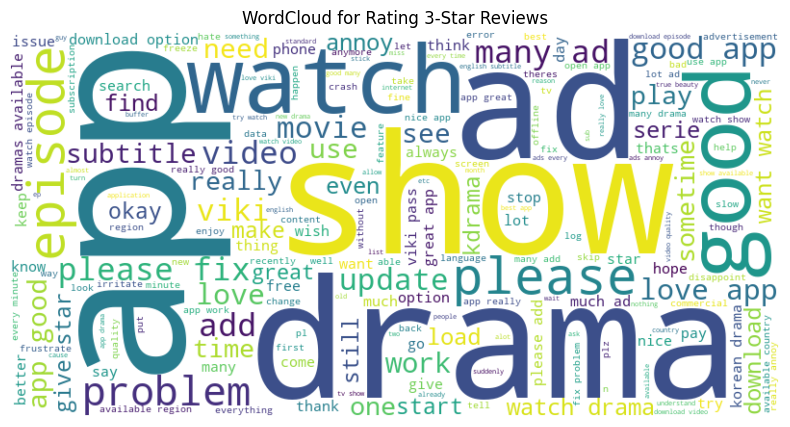

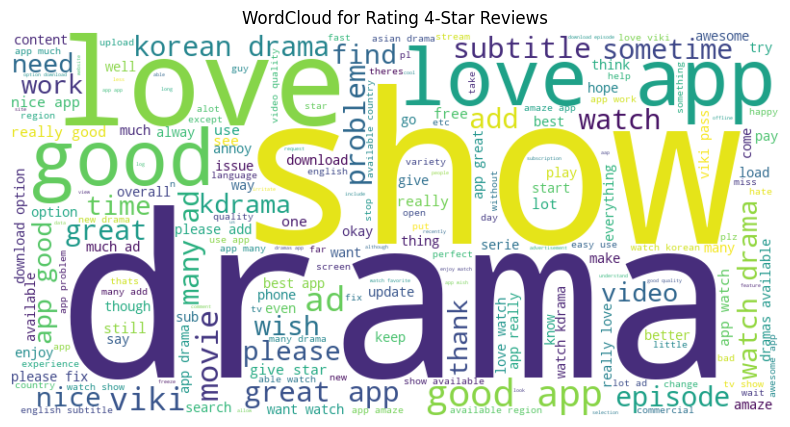

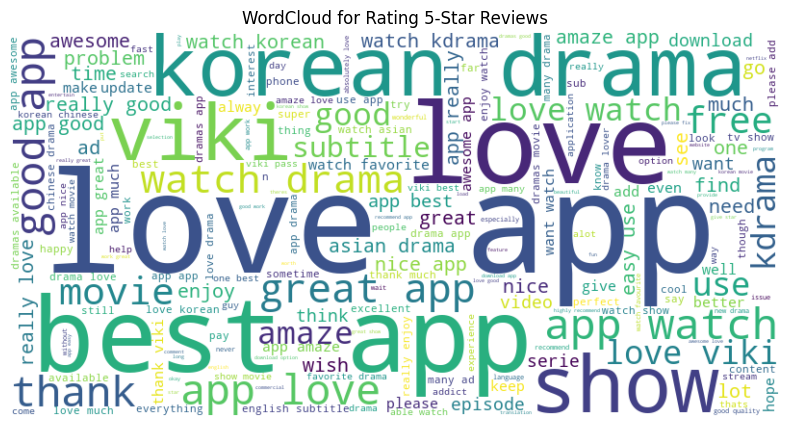

In [28]:
def plot_wordcloud_by_rating(df, rating_col='Rating', tokens_col='lemmatized_tokens'):
    ratings = sorted(df[rating_col].unique())
    
    for rating in ratings:
        plt.figure(figsize=(10, 5))
        tokens = df[df[rating_col] == rating][tokens_col].explode()
        text = ' '.join(tokens.dropna().astype(str))
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"WordCloud for Rating {rating}-Star Reviews")
        plt.show()
        
plot_wordcloud_by_rating(df)


Berdasarkan visualisasi di atas saya membuat lexicon sendiri dan dibantu dengan ai, berdasarkan kata kata yang sering muncul juga dan memberinya pembobotan yang sesuai.

In [29]:

lexicon = {
    'love': 3, 'enjoy': 2, 'cool': 2, 'easy': 2, 'great': 3, 'awesome': 4, 'best': 4,
    'helpful': 2, 'smoothly': 2, 'responsive': 2, 'fun': 2, 'clean': 2, 'intelligent': 3,
    'fantasy': 2, 'stable': 2, 'upgrade': 2, 'clear': 1, 'powerful': 3, 'nice': 2,
    'loveable': 3, 'accurate': 2, 'organized': 2, 'trustworthy': 3, 'high-quality': 3,
    'must-have': 3, 'excellent': 4, 'amazing': 4, 'perfect': 4, 'fantastic': 4,
    'wonderful': 3, 'smooth': 2, 'intuitive': 2, 'user-friendly': 3, 'satisfying': 2,
    'recommended': 2, 'superb': 3, 'beautiful': 2, 'addictive': 2, 'reliable': 2,
    'fast': 1, 'convenient': 2, 'engaging': 2, 'entertaining': 3, 'impressive': 3,
    'delightful': 3, 'subtitles': 2, 'offline mode': 2, 'premium': 1,
    'dubbed': 1, 'subtitles accurate': 3, 'video quality': 2,
    'variety of shows': 3,

    'hate': -3, 'terrible': -4, 'waste': -3, 'difficult': -2, 'boring': -2, 'mess': -2,
    'bad': -2, 'annoyed': -2, 'confusing': -2, 'unfair': -2, 'slowly': -2, 'crash': -3,
    'missing': -3, 'bug': -3, 'outdated': -2, 'noisy': -1, 'low-quality': -3,
    'glitch': -3, 'freeze': -2, 'unusable': -3, 'misleading': -3, 'unpleasant': -2,
    'inconsistent': -2, 'poor': -2, 'cluttered': -2, 'awful': -4, 'horrible': -4,
    'frustrating': -3, 'laggy': -3, 'buggy': -3, 'crashes': -3, 'slow': -2,
    'annoying': -2, 'disappointing': -3, 'useless': -3, 'glitchy': -3,
    'overpriced': -2, 'unreliable': -2, 'broken': -3, 'unresponsive': -3,
    'tedious': -2, 'problematic': -2, 'inferior': -2, 'buffering': -3,
    'ads': -2, 'dubbed poorly': -2, 'subtitles missing': -3,
    'loading time': -2, 'no English subs': -3, 'disappointed': -3,
    "can't": -3, 'even': -2, 'please': -3, 'many': -1, 'fix': -1, 'get': -1, 'much': -2, 'try': -3, 'worst': -4,
    'download': -1, 'say': -1, 'want': -2, 'keep': -1, 'show': -1, 'update': -3, 'really': -2, 'many': -1,

    'fine': 1, 'normal': 1, 'functional': 1, 'average': 1, 'okay': 1,
    'mediocre': -1, 'common': -1, 'typical': -1, 'expected': 1,
    'standard': 1, 'default': 1, 'routine': 0, 'basic': -1,
    'regular': -1, 'tolerable': 0, 'decent': 0, 'acceptable': 0,
    'so-so': 0, 'neither': 0, 'subscription': -2
}

In [30]:
def score_and_label(text):
    if isinstance(text, str):
        tokens = text.lower().split()
    else:
        tokens = [t.lower() for t in text]
    
    total_score = sum(lexicon.get(word, 0) for word in tokens)

    if total_score > 1:
        label = 'positive'
    elif total_score < -2:
        label = 'negative'
    else:
        label = 'neutral'

    return total_score, label

In [31]:
df['score'], df['sentiment'] = zip(*df['lemmatized_tokens'].apply(score_and_label))

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_9480\2577341965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'], df['sentiment'] = zip(*df['lemmatized_tokens'].apply(score_and_label))
C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_9480\2577341965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'], df['sentiment'] = zip(*df['lemmatized_tokens'].apply(score_and_label))


In [32]:
df

,Review,Rating,normalized_review,clean_review,tokens,lemmatized_tokens,lemmatized_sentence,score,sentiment
1,I have enjoyed a variety of shows on this serv...,5,i have enjoyed a variety of shows on this serv...,enjoyed variety shows service one best,"[enjoyed, variety, shows, service, one, best]","[enjoy, variety, show, service, one, best]",enjoy variety show service one best,5,positive
2,This app is the best platform to watch dramas ...,3,this app is the best platform to watch dramas ...,app best platform watch dramas noticing proxy ...,"[app, best, platform, watch, dramas, noticing,...","[app, best, platform, watch, dramas, notice, p...",app best platform watch dramas notice proxy vp...,-3,negative
3,it has too many ads,4,it has too many ads,many ads,"[many, ads]","[many, ads]",many ads,-3,negative
4,so much ads are comingfor minutes ads are ther...,1,so much ads are comingfor minutes ads are ther...,much ads comingfor minutes ads creates much di...,"[much, ads, comingfor, minutes, ads, creates, ...","[much, ads, comingfor, minutes, ads, create, m...",much ads comingfor minutes ads create much dis...,-9,negative
6,great I love the movies on it thats why I subs...,5,great i love the movies on it thats why i subs...,great love movies thats subscribed,"[great, love, movies, thats, subscribed]","[great, love, movies, thats, subscribe]",great love movies thats subscribe,6,positive
...,...,...,...,...,...,...,...,...,...
122976,stars ppl What are you waitin for Enjoy Good j...,5,stars ppl what are you waitin for enjoy good j...,stars ppl waitin enjoy good job devps thx lot ...,"[stars, ppl, waitin, enjoy, good, job, devps, ...","[star, ppl, waitin, enjoy, good, job, devps, t...",star ppl waitin enjoy good job devps thx lot make,2,positive
122977,Thx Vikigreat website I willdefinitly recomend...,5,thx vikigreat website i willdefinitly recomend...,thx vikigreat website willdefinitly recomend f...,"[thx, vikigreat, website, willdefinitly, recom...","[thx, vikigreat, website, willdefinitly, recom...",thx vikigreat website willdefinitly recomend f...,0,neutral
122979,Im unable to search for some channels for some...,4,i'm unable to search for some channels for som...,unable search channels reason,"[unable, search, channels, reason]","[unable, search, channel, reason]",unable search channel reason,0,neutral
122980,Is it me or when you try to search for somethi...,4,is it me or when you try to search for somethi...,try search something search bar says match,"[try, search, something, search, bar, says, ma...","[try, search, something, search, bar, say, match]",try search something search bar say match,-4,negative


visualisasikan persebaran dari sentimen nya

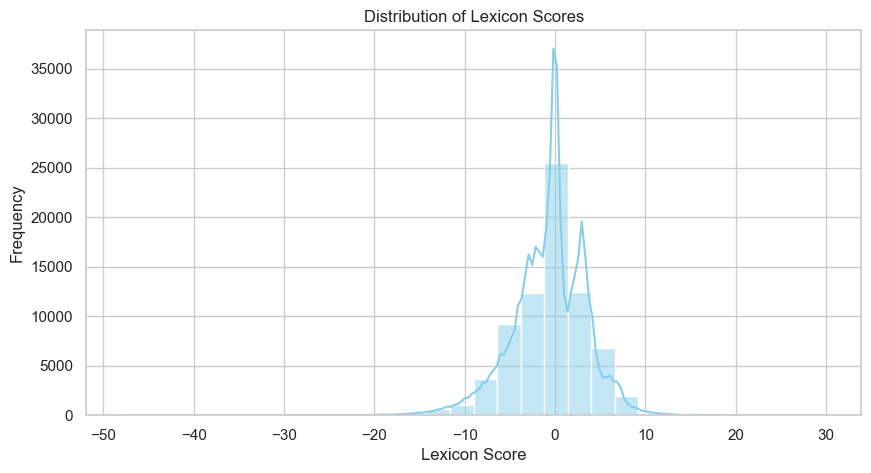

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_9480\2487346212.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


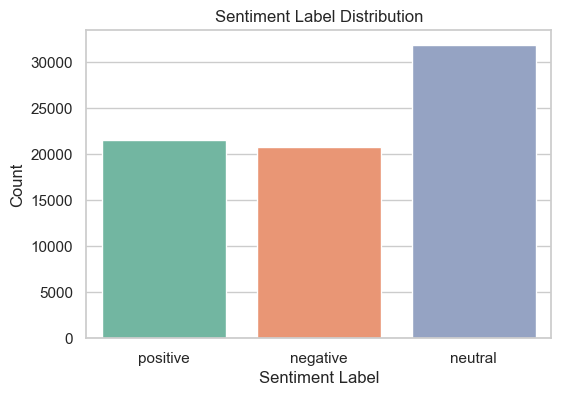

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_9480\2487346212.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='score', data=df, palette='Set3')


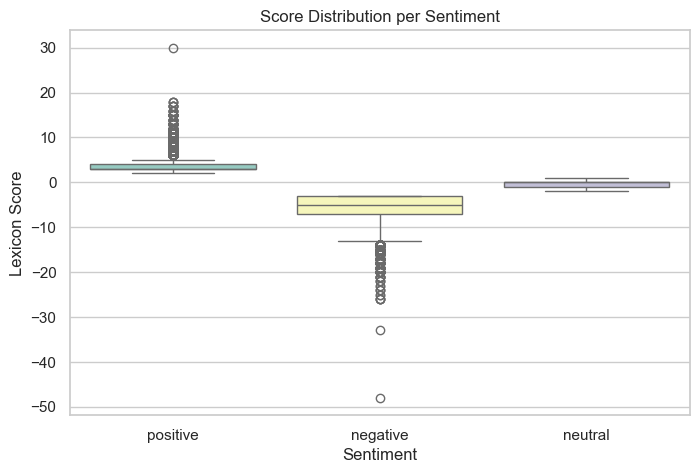

In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Lexicon Scores")
plt.xlabel("Lexicon Score")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment', y='score', data=df, palette='Set3')
plt.title("Score Distribution per Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Lexicon Score")
plt.show()


# Encoding, Split, dan Training

## MODEL LTSM

In [34]:
df_LTSM =  df[['lemmatized_sentence', 'sentiment']]

In [35]:
label_encoder = LabelEncoder()
df_LTSM['encoded_label'] = label_encoder.fit_transform(df_LTSM['sentiment'])

X = df_LTSM['lemmatized_sentence'].values
y = df_LTSM['encoded_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_9480\2158453062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LTSM['encoded_label'] = label_encoder.fit_transform(df_LTSM['sentiment'])


In [36]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [37]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


d:\KULIAH\Kuliah Semester 6\Praktikum Pembelajaran Mesin\UAS\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, Callback

class CustomEarlyStopping(Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get('val_accuracy')
        if val_acc is not None and val_acc >= 0.95:
            print(f"\n Validation accuracy {val_acc:.2f} reached 95%, stopping training.")
            self.model.stop_training = True

callbacks = [
    CustomEarlyStopping(),
    EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)  # optional
]

history = model.fit(
    X_train_pad,
    y_train,
    epochs=20,
    validation_data=(X_test_pad, y_test),
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/20
1856/1857 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7908 - loss: 0.4573
 Validation accuracy 0.98 reached 95%, stopping training.
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.7910 - loss: 0.4571 - val_accuracy: 0.9784 - val_loss: 0.0572


In [39]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

465/465 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9786 - loss: 0.0563
Test Accuracy: 0.9784


465/465 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step


<Figure size 600x500 with 0 Axes>

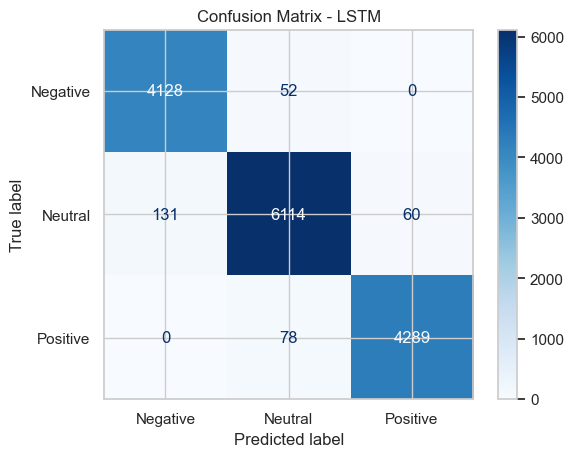

              precision    recall  f1-score   support

    Negative       0.97      0.99      0.98      4180
     Neutral       0.98      0.97      0.97      6305
    Positive       0.99      0.98      0.98      4367

    accuracy                           0.98     14852
   macro avg       0.98      0.98      0.98     14852
weighted avg       0.98      0.98      0.98     14852



In [56]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
report = classification_report(y_test, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - LSTM")
plt.show()

print(report)

### Uji Coba dengan kalimat baru

In [41]:
new_sentences = [
    "I love using the Viki app, it’s really great!", 
    "The app has some shows and average performance.",      
    "Terrible experience—too many ads, it's slow and keeps freezing.",
    "Viki is an excellent platform for streaming Asian dramas with high-quality subtitles and a user-friendly interface."
]

sequences = tokenizer.texts_to_sequences(new_sentences)
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=100, padding='post')

predictions = model.predict(padded)
predicted_labels = np.argmax(predictions, axis=1)

label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

print("\n=== Kalimat dan Prediksi Sentimen ===")
for i, sent in enumerate(new_sentences):
    print(f"{sent} --> {label_map[predicted_labels[i]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step

=== Kalimat dan Prediksi Sentimen ===
I love using the Viki app, it’s really great! --> Positive
The app has some shows and average performance. --> Neutral
Terrible experience—too many ads, it's slow and keeps freezing. --> Negative
Viki is an excellent platform for streaming Asian dramas with high-quality subtitles and a user-friendly interface. --> Positive


## Logistic Regresion

In [42]:
df_LR =  df[['lemmatized_sentence', 'sentiment']]

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(df_LR['lemmatized_sentence'])
y = df_LR['sentiment']

from sklearn.model_selection import train_test_split
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Logistic Regression model
logres_model = LogisticRegression(max_iter=200)
logres_model.fit(X_train_tf, y_train_tf)


LogisticRegression(max_iter=200)

In [53]:
from sklearn.metrics import accuracy_score

# Prediksi
y_pred_logres = logres_model.predict(X_test_tf)

# Hitung akurasi
accuracy = accuracy_score(y_test_tf, y_pred_logres)
print(f"Akurasi Logistic Regression: {accuracy:.2%}")


Akurasi Logistic Regression: 92.69%


In [44]:
y_pred_logres = logres_model.predict(X_test_tf)
print("Logistic Regression Performance:")
print(classification_report(y_test_tf, y_pred_logres, target_names=['Negative', 'Neutral', 'Positive']))

Logistic Regression Performance:
              precision    recall  f1-score   support

    Negative       0.94      0.88      0.91      4180
     Neutral       0.89      0.95      0.92      6305
    Positive       0.97      0.95      0.96      4367

    accuracy                           0.93     14852
   macro avg       0.93      0.92      0.93     14852
weighted avg       0.93      0.93      0.93     14852



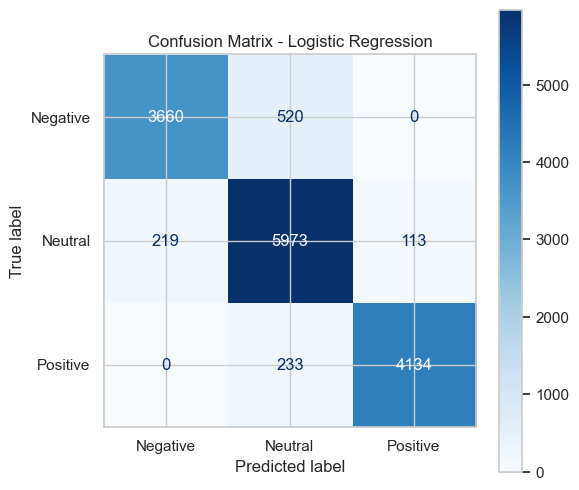

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Prediksi data uji
y_pred_logres = logres_model.predict(X_test_tf)

# 2. Buat Confusion Matrix
cm_logres = confusion_matrix(y_test_tf, y_pred_logres)

# 3. Visualisasi Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logres, display_labels=['Negative', 'Neutral', 'Positive'])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


### Uji coba dengan Kalimat baru 

In [45]:
new_sentences = [
    "I love using the Viki app, it’s really great!", 
    "The app has some shows and average performance.",      
    "Terrible experience—too many ads, it's slow and keeps freezing.",
    "Viki is an excellent platform for streaming Asian dramas with high-quality subtitles and a user-friendly interface."
]

new_tfidf = vectorizer.transform(new_sentences)
new_preds = logres_model.predict(new_tfidf)
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

print("\n=== Kalimat dan Prediksi Sentimen ===")
for sent, pred in zip(new_sentences, new_preds):
    print(f"{sent} --> {pred}")


=== Kalimat dan Prediksi Sentimen ===
I love using the Viki app, it’s really great! --> positive
The app has some shows and average performance. --> neutral
Terrible experience—too many ads, it's slow and keeps freezing. --> negative
Viki is an excellent platform for streaming Asian dramas with high-quality subtitles and a user-friendly interface. --> positive


## Random Forest

In [46]:
df_RF=  df[['lemmatized_sentence', 'sentiment']]

In [47]:
texts = df_RF['lemmatized_sentence'].values
labels = df_RF['sentiment'].values

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Batasi 10.000 fitur teratas
X = tfidf_vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels_encoded, test_size=0.2, random_state=42)

In [48]:
rf_sentiment_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [49]:
rf_sentiment_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred = rf_sentiment_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 90.83%


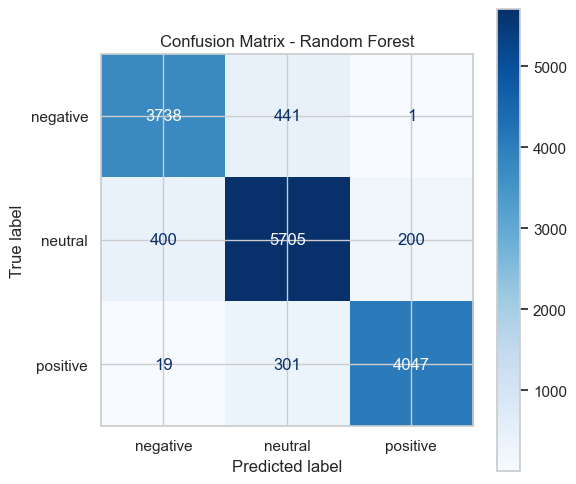

              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      4180
     neutral       0.88      0.90      0.89      6305
    positive       0.95      0.93      0.94      4367

    accuracy                           0.91     14852
   macro avg       0.91      0.91      0.91     14852
weighted avg       0.91      0.91      0.91     14852



In [54]:
# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# 4. Visualisasi
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# 5. Laporan Klasifikasi (Optional)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

### Uji coba dengan Kalimat baru 

In [52]:
new_texts = ["I love using the Viki app, it’s really great!", "The app has some shows and average performance.", "Terrible experience—too many ads, it's slow and keeps freezing.",
            "Viki is an excellent platform for streaming Asian dramas with high-quality subtitles and a user-friendly interface."]
new_tfidf = tfidf_vectorizer.transform(new_texts)
new_predictions = rf_sentiment_model.predict(new_tfidf)

predicted_labels = label_encoder.inverse_transform(new_predictions)
for text, sentiment in zip(new_texts, predicted_labels):
    print(f"Text: {text} --> {sentiment}")

Text: I love using the Viki app, it’s really great! --> positive
Text: The app has some shows and average performance. --> neutral
Text: Terrible experience—too many ads, it's slow and keeps freezing. --> negative
Text: Viki is an excellent platform for streaming Asian dramas with high-quality subtitles and a user-friendly interface. --> positive
